<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [119]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [8]:
### Tom's file location
df = pd.read_csv(r"D:\HSLU_Projects\course_setting\Data\bereinigte_DATEN_ano_csv.csv")
### Christoph's file location
#df = pd.read_excel("Data/bereinigte_DATEN_ano.xlsx")

In [9]:
df.head()

,Unnamed: 0,V1,athlete,gender,run,location,date,TurnNr,MinimalRadius,VelocityAtMinRadius,...,azitonextnext,HORIZONTALGATEDISTANCE,VERTICALGATEDISTANCE,regularbs1orfs2,steepness_A,filter_$,goofy2_regular1,@2Ferse_3Zehe_4Ferse,Zehen1_Fersen2,DistanzSchätz
0,0,35,3,1,1,Zermatt,200915,2,10.63,53.6,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
1,1,36,3,1,2,Zermatt,200915,2,11.05,52.3,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
2,2,37,3,1,3,Zermatt,200915,2,10.99,52.8,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
3,3,38,3,1,4,Zermatt,200915,2,11.41,52.2,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
4,4,39,5,1,1,Zermatt,200915,2,11.31,49.7,...,341.45477,8.515579,20.414966,1,2,0,2,3,1,30.635388


In [18]:
locations_and_turns = df[['location', 'TurnNr']]
turn_no = df['TurnNr'].unique()
location_set = df['location'].unique()

In [91]:
turn_no

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19,
       11, 20, 21, 22, 23, 24], dtype=int64)

In [44]:
df = df.loc[df['location'] == 'Zermatt']
df = df.loc[df['TurnNr'] == 16]

In [20]:
df_clean = df.drop(["date", "location", "Unnamed0", "vectortonext", "vector2Dtonext", "vectortonextnorm", "vector2Dtonextnorm", "projpttonext", "vectortonextnext", "vector2Dtonextnext", "vectortonextnextnorm", "vector2Dtonextnextnorm"], axis=1)

In [21]:
df_clean.columns

Index(['Unnamed: 0', 'V1', 'athlete', 'gender', 'run', 'TurnNr',
       'MinimalRadius', 'VelocityAtMinRadius', 'VelocityAtTurnEntry',
       'VelocityAtTurnExit', 'TimeStarttoEnd', 'TimeStartToMinRad',
       'TimeMinRadToEnd', 'GlideTime_endtostart', 'TimeStarttoEnd_2',
       'Initiation', 'Completion', 'Gliding', 'GATEDISTANCE', 'dist2Dtonext',
       'STEEPNESS', 'azitonext', 'slopechangetonext', 'angletonext',
       'projtonext', 'offsettonext', 'dist3Dtonextnext', 'dts2Dtonextnext',
       'slopetonextnext', 'azitonextnext', 'HORIZONTALGATEDISTANCE',
       'VERTICALGATEDISTANCE', 'regularbs1orfs2', 'steepness_A', 'filter_$',
       'goofy2_regular1', '@2Ferse_3Zehe_4Ferse', 'Zehen1_Fersen2',
       'DistanzSchätz'],
      dtype='object')

In [30]:
features = df_clean.columns[4:17]

In [34]:
print(features)

Index(['run', 'TurnNr', 'MinimalRadius', 'VelocityAtMinRadius',
       'VelocityAtTurnEntry', 'VelocityAtTurnExit', 'TimeStarttoEnd',
       'TimeStartToMinRad', 'TimeMinRadToEnd', 'GlideTime_endtostart',
       'TimeStarttoEnd_2', 'Initiation', 'Completion'],
      dtype='object')


In [46]:
# distribute the dataset into two components X and Y
x = df_clean.iloc[:, 4:17]
y = df_clean.iloc[:, 2]

In [47]:
x

,run,TurnNr,MinimalRadius,VelocityAtMinRadius,VelocityAtTurnEntry,VelocityAtTurnExit,TimeStarttoEnd,TimeStartToMinRad,TimeMinRadToEnd,GlideTime_endtostart,TimeStarttoEnd_2,Initiation,Completion
0,1,2,10.63,53.6,55.7,55.2,1.28,0.64,0.64,0.24,1.52,0.421053,0.421053
1,2,2,11.05,52.3,57.7,55.6,1.32,0.60,0.72,0.24,1.56,0.384615,0.461538
2,3,2,10.99,52.8,57.0,58.2,1.32,0.60,0.72,0.24,1.56,0.384615,0.461538
3,4,2,11.41,52.2,54.5,54.9,1.52,0.88,0.64,0.24,1.76,0.500000,0.363636
4,1,2,11.31,49.7,50.0,58.1,1.80,1.08,0.72,0.28,2.08,0.519231,0.346154
5,2,2,11.97,50.1,49.4,56.6,1.68,0.88,0.80,0.28,1.96,0.448980,0.408163
6,3,2,12.82,53.2,52.1,58.3,1.72,1.04,0.68,0.24,1.96,0.530612,0.346939
7,4,2,10.07,47.0,49.8,54.8,1.80,1.08,0.72,0.24,2.04,0.529412,0.352941
8,1,2,11.81,45.5,49.0,49.3,1.88,1.16,0.72,0.24,2.12,0.547170,0.339623
9,2,2,12.42,46.9,51.4,47.1,1.76,1.12,0.64,0.00,1.76,0.636364,0.363636


In [127]:
results = {}

#df_clean_sub = df_clean.loc[df_clean['location'] == 'zermatt']

# distribute the dataset into two components X and Y
x = df_clean.iloc[:, 4:17]
y = df_clean.iloc[:, 2]

x_for_zermatt = x.loc[df['location'] == 'Zermatt']


n_components = 2
tsne = TSNE(n_components)


for locat in location_set:
    result = {}
    x_sub = x.loc[df['location'] == locat]
    no_of_turns = df.loc[df['location'] == locat]
    no_of_turns = no_of_turns['TurnNr'].unique()
    print("new_location")
    print(locat)
    for i in no_of_turns:
        x_sub_sub = x_sub.loc[df['TurnNr'] == i]
        print("Something's Here!")
        answer = tsne.fit_transform(x_sub_sub)
        result[i] = answer
    results[locat] = result
    print("result_added")


new_location
Zermatt
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
result_added
new_location
Stelvio
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
result_added
new_location
Diavolezza
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Something's Here!
Somethin

(23, 7)


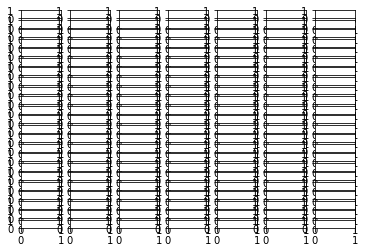

In [118]:
results_df = pd.DataFrame.from_dict(results)
print(results_df.shape)
results_df.iloc[0,0]

results_df.columns[1]
#fig, ax = plt.subplots(nrows=results_df.shape[0], ncols = results_df.shape[1])

#print(len(ax))    



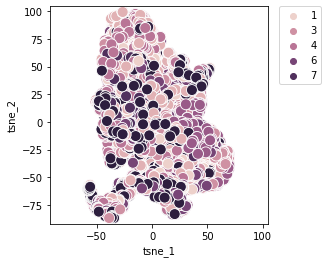

In [25]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(x)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)